**Import Lib**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Uplode file**

In [130]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b'"","TV","Radio","Newspaper","Sales"\r\n"1",230.1,37.8,69.2,22.1\r\n"2",44.5,39.3,45.1,10.4\r\n"3",17.2,45.9,69.3,9.3\r\n"4",151.5,41.3,58.5,18.5\r\n"5",180.8,10.8,58.4,12.9\r\n"6",8.7,48.9,75,7.2\r\n"7",57.5,32.8,23.5,11.8\r\n"8",120.2,19.6,11.6,13.2\r\n"9",8.6,2.1,1,4.8\r\n"10",199.8,2.6,21.2,10.6\r\n"11",66.1,5.8,24.2,8.6\r\n"12",214.7,24,4,17.4\r\n"13",23.8,35.1,65.9,9.2\r\n"14",97.5,7.6,7.2,9.7\r\n"15",204.1,32.9,46,19\r\n"16",195.4,47.7,52.9,22.4\r\n"17",67.8,36.6,114,12.5\r\n"18",281.4,39.6,55.8,24.4\r\n"19",69.2,20.5,18.3,11.3\r\n"20",147.3,23.9,19.1,14.6\r\n"21",218.4,27.7,53.4,18\r\n"22",237.4,5.1,23.5,12.5\r\n"23",13.2,15.9,49.6,5.6\r\n"24",228.3,16.9,26.2,15.5\r\n"25",62.3,12.6,18.3,9.7\r\n"26",262.9,3.5,19.5,12\r\n"27",142.9,29.3,12.6,15\r\n"28",240.1,16.7,22.9,15.9\r\n"29",248.8,27.1,22.9,18.9\r\n"30",70.6,16,40.8,10.5\r\n"31",292.9,28.3,43.2,21.4\r\n"32",112.9,17.4,38.6,11.9\r\n"33",97.2,1.5,30,9.6\r\n"34",265.6,20,0.3,17.4\r\n"35",95.7,1.4,7.4,9.5\r

**Read file**

In [131]:
import pandas as pd
data = pd.read_csv("Advertising.csv")

**Describe**

In [132]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [133]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [134]:
print(data.shape)

(200, 5)


**Checking null values**

In [135]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Lableing**

In [149]:
X = data.drop('Sales', axis=1)

In [150]:
X = X.drop(columns='Unnamed: 0')
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [152]:
Y = data[['Sales']]
Y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [137]:
import seaborn as sns


**Visulization**

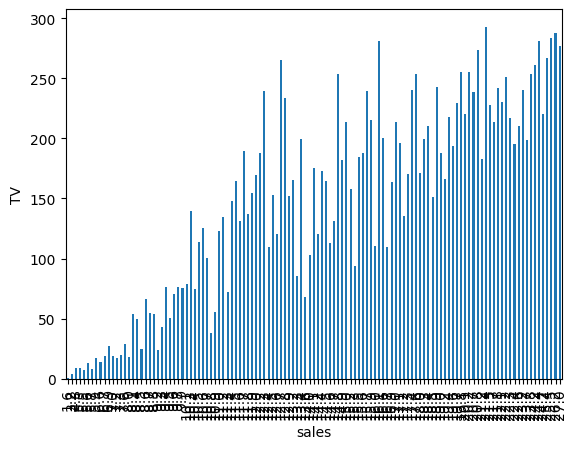

In [163]:
region_unemployment = data.groupby('Sales')[ 'TV'].mean()
region_unemployment.plot(kind='bar')
plt.xlabel("sales")
plt.ylabel("TV")
plt.show()

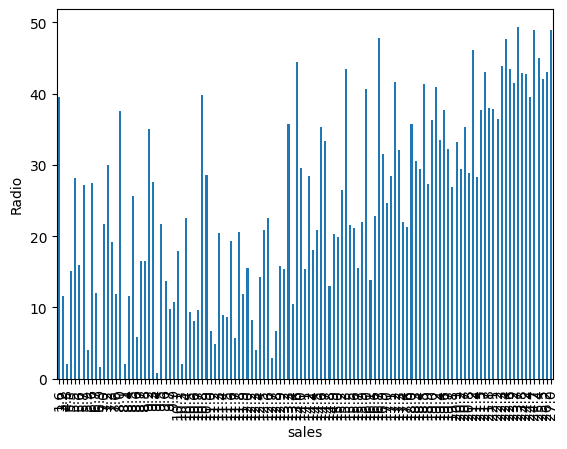

In [164]:
region_unemployment = data.groupby('Sales')[ 'Radio'].mean()
region_unemployment.plot(kind='bar')
plt.xlabel("sales")
plt.ylabel("Radio")
plt.show()

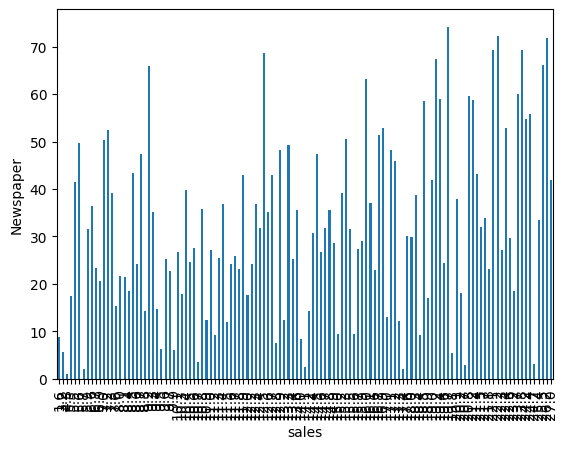

In [165]:
region_unemployment = data.groupby('Sales')[ 'Newspaper'].mean()
region_unemployment.plot(kind='bar')
plt.xlabel("sales")
plt.ylabel("Newspaper")
plt.show()

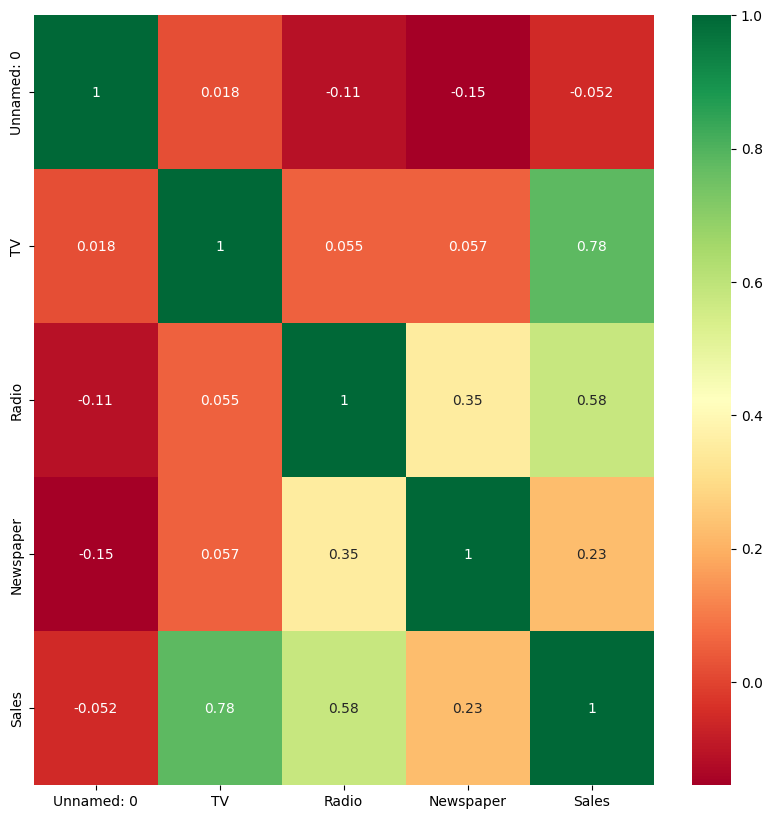

In [138]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Train test**

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

**Applinig Model**

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lin_reg_model= LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [155]:
from sklearn import metrics
training_data_prediction= lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8978965639487505


In [156]:
lin_reg_model.score(X_test, Y_test)

0.8938596580432622